<a href="https://colab.research.google.com/github/Abdul-Karim1/TSE-Coding/blob/main/DementiaPrognosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/ADNI'

Dispay DCM file


In [ ]:
pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pydicom;
import matplotlib.pyplot as plt
import pydicom
from skimage import img_as_float
from skimage.restoration import (denoise_tv_chambolle,denoise_wavelet)
from skimage.util import img_as_ubyte
from skimage.metrics import peak_signal_noise_ratio
from skimage import io
import numpy as np

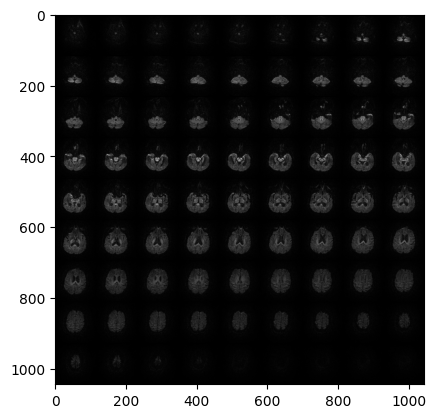

In [ ]:

# Load the DICOM file
dcm = pydicom.dcmread('/content/drive/MyDrive/ADNI/036_S_6231/Axial_DTI/2018-03-05_13_05_31.0/I973669/ADNI_036_S_6231_MR_Axial_DTI__br_raw_20180314164134931_116_S667012_I973669.dcm')

# Extract the image data
img = dcm.pixel_array

# Display the image using matplotlib
plt.imshow(img, cmap='gray')
plt.show()
plt.imsave("/content/drive/MyDrive/ADNI/DenoisedImage/unNoised.tiff",img, cmap='gray')

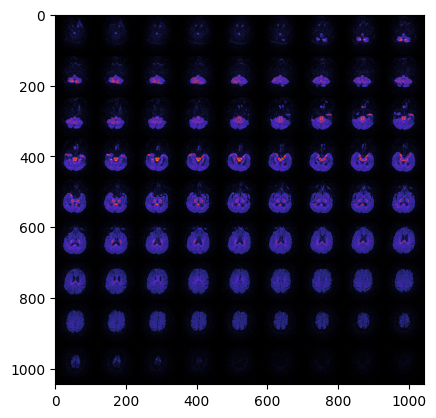

In [ ]:
# Display the image using matplotlib with cmap CMRmap
plt.imshow(img, cmap='CMRmap')
plt.show()
# colormap returns the colormap for the current figure as a three-column matrix of RGB triplets.Colormaps or Cmap in Python is a very useful tool for data visualization. Matlibpro comes with a number of built-in colormaps, such as sequential, diverging, cyclic, qualitative, miscellaneous, etc. You can modify these default Cmaps or create your own custom ones using Python.

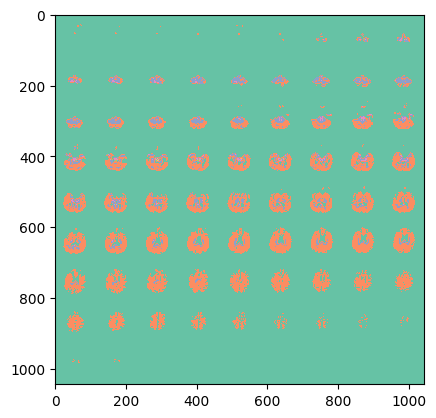

In [ ]:
# Display the image using matplotlib with cmap Set2
plt.imshow(img, cmap='Set2')
plt.show()

Denoising

In [ ]:
noisy_img = img_as_float(io.imread("/content/drive/MyDrive/ADNI/036_S_6231/Axial_DTI/2018-03-05_13_05_31.0/I973669/ADNI_036_S_6231_MR_Axial_DTI__br_raw_20180314164134931_116_S667012_I973669.dcm"))
ref_img = img_as_float(io.imread("/content/drive/MyDrive/ADNI/036_S_6231/Axial_DTI/2018-03-05_13_05_31.0/I973669/ADNI_036_S_6231_MR_Axial_DTI__br_raw_20180314164134931_116_S667012_I973669.dcm"))


In [ ]:
# denoise_TV = denoise_tv_chambolle(noisy_img, weight=0.3)
# noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
# TV_cleaned_psnr = peak_signal_noise_ratio(ref_img, denoise_TV)
# print("PSNR of input noisy image = ", noise_psnr)
# print("PSNR of cleaned image = ", TV_cleaned_psnr)
# plt.imsave("/content/drive/MyDrive/ADNI/DenoisedImage/TV_smoothed.tif", denoise_TV, cmap='gray')
from PIL import Image
denoise_TV = denoise_tv_chambolle(noisy_img, weight=0.3)
noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
TV_cleaned_psnr = peak_signal_noise_ratio(ref_img, denoise_TV)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", TV_cleaned_psnr)
# im = Image.fromarray((denoise_TV).astype(np.uint8))
# im.save("/content/drive/MyDrive/ADNI/DenoisedImage/TV_smoothed.dcm")
plt.imsave("/content/drive/MyDrive/ADNI/DenoisedImage/TV_smoothed.tiff", denoise_TV, cmap='gray')

# plt.imsave("/content/drive/MyDrive/ADNI/DenoisedImage/TV_smoothed.tif", denoise_TV, cmap='gray')



PSNR of input noisy image =  inf
PSNR of cleaned image =  60.64315564092382


In [ ]:
wavelet_smoothed = denoise_wavelet(noisy_img,method='BayesShrink', mode='soft',rescale_sigma=True)
noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
Wavelet_cleaned_psnr = peak_signal_noise_ratio(ref_img, wavelet_smoothed)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", Wavelet_cleaned_psnr)

plt.imsave("/content/drive/MyDrive/ADNI/DenoisedImage/wavelet_smoothed.tiff", wavelet_smoothed, cmap='gray')

PSNR of input noisy image =  inf
PSNR of cleaned image =  90.49230206613964


In [ ]:
!pip install medpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.3 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214964 sha256=ba52fc293e61e4a5db8f6b0337a5cba2f6f5cf0488a4c0b37f8290630f42fef1
  Stored in directory: /root/.cache/pip/wheels/41/46/a2/7c585b78f216a3dd8723dbab5f439822fa5dfbff563757a49e
Successfully built medpy


In [ ]:
import medpy.filter.smoothing
from medpy.filter.smoothing import anisotropic_diffusion

# niter= number of iterations
#kappa = Conduction coefficient (20 to 100)
#gamma = speed of diffusion (<=0.25)
#Option: Perona Malik equation 1 or 2. A value of 3 is for Turkey's biweight function 
img_aniso_filtered = anisotropic_diffusion(noisy_img, niter=50, kappa=50, gamma=0.2, option=2) 

noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
anisotropic_cleaned_psnr = peak_signal_noise_ratio(ref_img, img_aniso_filtered)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", anisotropic_cleaned_psnr)


# plt.imshow(img_aniso_filtered, cmap='gray')
plt.imsave("/content/drive/MyDrive/ADNI/DenoisedImage/anisotropic_denoised.tiff", img_aniso_filtered, cmap='gray')

PSNR of input noisy image =  inf
PSNR of cleaned image =  61.74900384002031


<ipython-input-59-75bd4bb83692>:11: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  anisotropic_cleaned_psnr = peak_signal_noise_ratio(ref_img, img_aniso_filtered)


In [ ]:
from skimage.restoration import denoise_nl_means, estimate_sigma

sigma_est = np.mean(estimate_sigma(noisy_img))


NLM_skimg_denoise_img = denoise_nl_means(noisy_img, h=1.15 * sigma_est, fast_mode=True,patch_size=9, patch_distance=5)

noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
NLM_skimg_cleaned_psnr = peak_signal_noise_ratio(ref_img, NLM_skimg_denoise_img)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", NLM_skimg_cleaned_psnr)


denoise_img_as_8byte = img_as_ubyte(NLM_skimg_denoise_img)

#plt.imshow(NLM_skimg_denoise_img)
#plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')
plt.imsave("/content/drive/MyDrive/ADNI/DenoisedImage/NLM_skimage_denoised.tiff", denoise_img_as_8byte, cmap='gray')

PSNR of input noisy image =  inf
PSNR of cleaned image =  81.52556985846135
